### Loading Important Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Reading (LOADING) the Dataset

In [2]:
df = pd.read_csv('ParisHousing.csv')
print(df.shape)
df.head(10)

(10000, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


Looking at the dataset, it iis quite big and also has lot's of features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

It has no empty cells. good to work with.

Also looking at the description, it seems to have no outliers.

### Exploratory Data Analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3644722e90>,
      dtype=object)

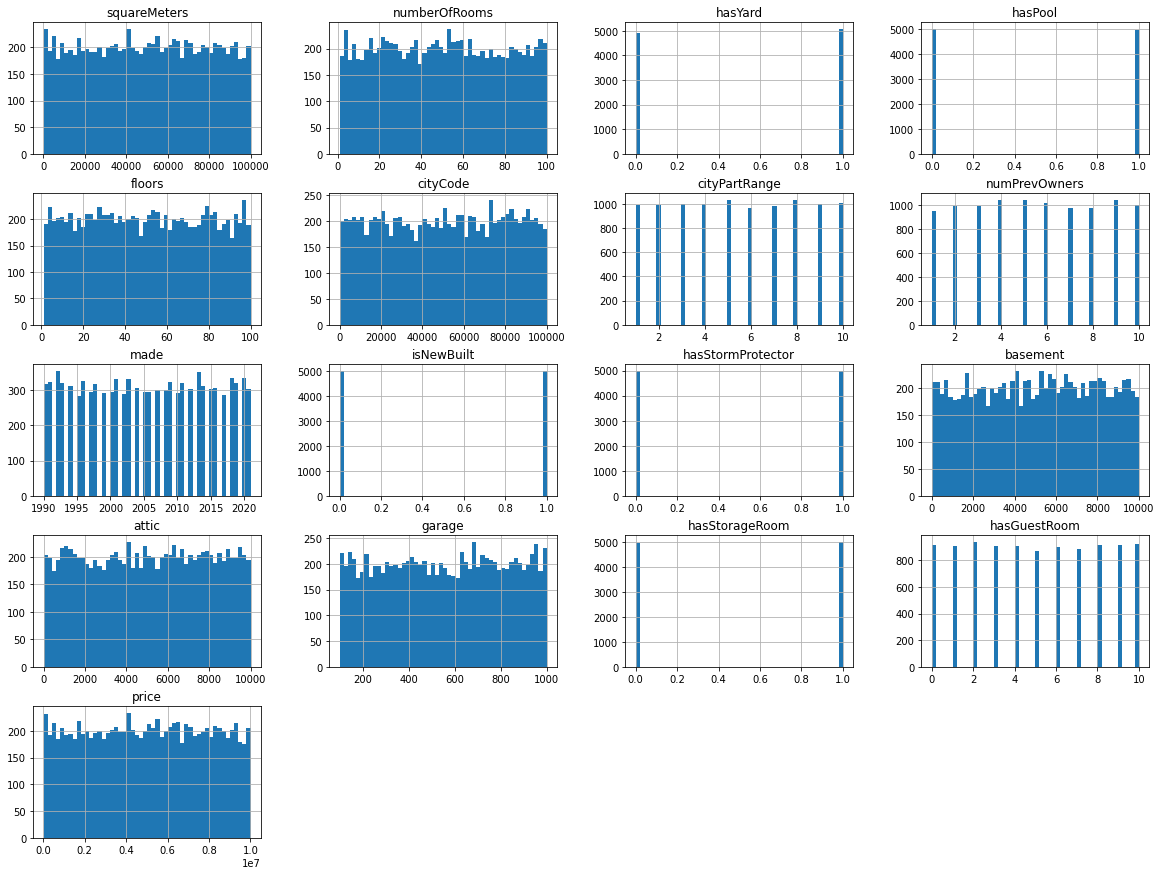

In [6]:
df.hist(figsize=(20, 15), bins=50)

Looking at this plots, it is vividly seen that the data is properly distributed and I can say it has no outliers, but will check to confirm.

#### Checking for Outliers

In [7]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

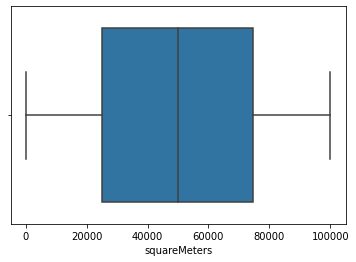

In [8]:
sns.boxplot(x='squareMeters', data=df)

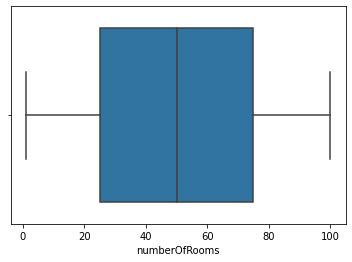

In [9]:
sns.boxplot(x='numberOfRooms', data=df)

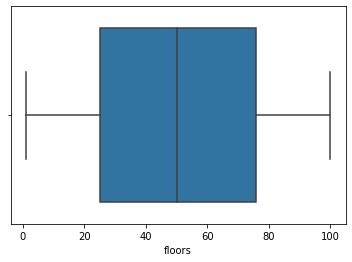

In [10]:
sns.boxplot(x='floors', data=df)

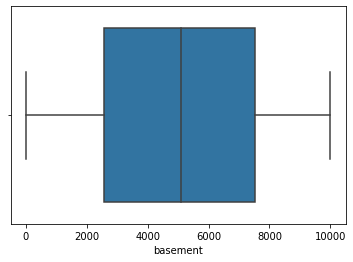

In [11]:
sns.boxplot(x='basement', data=df)

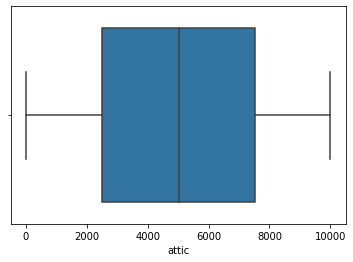

In [12]:
sns.boxplot(x='attic', data=df)

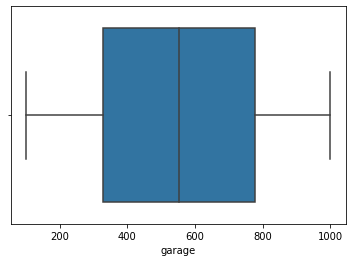

In [13]:
sns.boxplot(x='garage', data=df)

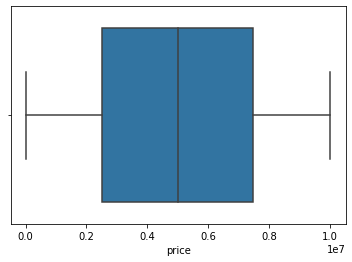

In [14]:
sns.boxplot(x='price', data=df)

With this it can be concluded that the data is clean. 

Next step is to check for correlation and perform feature engineering

In [15]:
corr = df.corr()
corr['price'].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

#### Feature Engineering

In [16]:
# room sizes
df['roomSizes'] = df['squareMeters'] / df['numberOfRooms']

In [17]:
# AVgfloorsize
df['avgFloorSizes'] = df['squareMeters'] / df['floors']

In [18]:
# Garage sizes
df['garageSizes'] = df['squareMeters'] / df['garage']

In [19]:
# Living Rooms
df['livingRooms'] = df['numberOfRooms'] = df['hasGuestRoom']

In [20]:
# Avg prev space
df['prevOwnerSizes'] = df['squareMeters'] / df['numPrevOwners']

In [21]:
# price per square meter
df['pricePerSquaremeter'] = df['squareMeters'] / df['price'] 

In [22]:
# Garage price 
df['garagePrice'] = df['price'] / df['garage'] 

In [23]:
# city part vs price
df['cityPartPrice'] = df['price'] / df['cityPartRange']

In [24]:
corr = df.corr()
corr['price'].sort_values(ascending=False)

price                  1.000000
squareMeters           0.999999
garageSizes            0.565084
garagePrice            0.564734
prevOwnerSizes         0.486529
cityPartPrice          0.481877
pricePerSquaremeter    0.322920
avgFloorSizes          0.220022
roomSizes              0.215429
numPrevOwners          0.016619
cityPartRange          0.008813
hasStormProtector      0.007496
floors                 0.001654
attic                 -0.000600
livingRooms           -0.000644
numberOfRooms         -0.000644
hasGuestRoom          -0.000644
cityCode              -0.001539
hasStorageRoom        -0.003485
basement              -0.003967
hasPool               -0.005070
hasYard               -0.006119
made                  -0.007210
isNewBuilt            -0.010643
garage                -0.017229
Name: price, dtype: float64

In [25]:
# dropping Non-correlating features

non_correlating = ['garage', 'isNewBuilt', 'made' ,'hasYard', 'hasPool', 'basement' ,'hasStorageRoom' ,'cityCode', 'numberOfRooms', 'hasGuestRoom', 'livingRooms', 'attic']
df_1 = df.drop(non_correlating, axis=1)
df_1.head()

,squareMeters,floors,cityPartRange,numPrevOwners,hasStormProtector,price,roomSizes,avgFloorSizes,garageSizes,prevOwnerSizes,pricePerSquaremeter,garagePrice,cityPartPrice
0,75523,63,3,8,1,7559081.5,25174.333333,1198.777778,78.998954,9440.375000,0.009991,7906.989017,2.519694e+06
1,80771,98,8,6,0,8085989.5,2071.051282,824.193878,631.023438,13461.833333,0.009989,63171.792969,1.010749e+06
2,55712,19,6,8,0,5574642.1,960.551724,2932.210526,412.681481,6964.000000,0.009994,41293.645185,9.291070e+05
3,32316,6,10,4,1,3232561.2,687.574468,5386.000000,90.016713,8079.000000,0.009997,9004.348747,3.232561e+05
4,70429,90,3,7,0,7055052.0,3706.789474,782.544444,241.195205,10061.285714,0.009983,24161.136986,2.351684e+06


In [26]:
df_1.describe()

,squareMeters,floors,cityPartRange,numPrevOwners,hasStormProtector,price,roomSizes,avgFloorSizes,garageSizes,prevOwnerSizes,pricePerSquaremeter,garagePrice,cityPartPrice
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,49870.13120,50.276300,5.510100,5.521700,0.499900,4.993448e+06,2477.020584,2548.610002,128.615030,14267.119268,0.009957,12877.896784,1.448834e+06
std,28774.37535,28.889171,2.872024,2.856667,0.500025,2.877424e+06,6272.369628,6567.191171,133.119283,16761.403324,0.000163,13320.179774,1.706921e+06
min,89.00000,1.000000,1.000000,1.000000,0.000000,1.031350e+04,1.626374,1.236111,0.116719,16.444444,0.006219,14.348265,1.469900e+03
25%,25098.50000,25.000000,3.000000,3.000000,0.000000,2.516402e+06,501.585091,499.880994,45.355846,4588.800000,0.009974,4545.079445,4.600528e+05
50%,50105.50000,50.000000,5.000000,5.000000,0.000000,5.016180e+06,998.828571,991.584793,90.156262,8971.400000,0.009987,9026.229782,9.138042e+05
75%,74609.75000,76.000000,8.000000,8.000000,1.000000,7.469092e+06,1951.107143,1981.373626,157.371429,16361.950000,0.009993,15751.337763,1.665458e+06
max,99999.00000,100.000000,10.000000,10.000000,1.000000,1.000677e+07,99365.000000,99750.000000,942.598039,99913.000000,0.010000,94301.938235,1.000294e+07


In [27]:
df_1.isna().sum()

squareMeters           0
floors                 0
cityPartRange          0
numPrevOwners          0
hasStormProtector      0
price                  0
roomSizes              0
avgFloorSizes          0
garageSizes            0
prevOwnerSizes         0
pricePerSquaremeter    0
garagePrice            0
cityPartPrice          0
dtype: int64

### Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

price = df_1.price
df_2 = df_1.drop('price', axis=1)

df_3 = scaler.fit_transform(df_2)

train, test, train_price, test_price = train_test_split(df_3, price, test_size = 0.2, random_state=42)
train, val, train_price, val_price = train_test_split(train, train_price, test_size = 0.15, random_state=42)

train.shape, train_price.shape, val.shape, val_price.shape, test.shape ,test_price.shape

((6800, 12), (6800,), (1200, 12), (1200,), (2000, 12), (2000,))

In [31]:
train

array([[-0.70028067,  0.89047159, -0.17761881, ...,  0.07836321,
         0.6788835 , -0.49952177],
       [ 0.18961807,  1.16740581, -0.17761881, ...,  0.14719787,
         0.43441734, -0.1993072 ],
       [ 1.12278664,  0.40583671,  1.56340067, ...,  0.20398133,
         1.03827078, -0.36690886],
       ...,
       [ 1.33659867, -1.08268471, -1.22223049, ...,  0.23686854,
         0.07632305,  1.7398345 ],
       [ 0.6291283 , -1.01345115,  1.56340067, ...,  0.19989556,
        -0.42337371, -0.45018376],
       [ 0.60476513,  0.99432192, -0.17761881, ...,  0.17457235,
        -0.43329768, -0.0594232 ]])

### Modeling

In [32]:
# Linear Regressor

lin = LinearRegression()
lin.fit(train, train_price)
print(lin.score(val, val_price))

0.9999994479631704


In [42]:
scores = cross_val_score(lin, train, train_price, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[0.99999942 0.9999994  0.99999941 0.9999994  0.99999941] 0.9999994053314509 7.147398311662685e-09


In [46]:
predictions = cross_val_predict(lin,val, val_price, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(val_price, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

0.9999994449520933


In [33]:
# RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train, train_price)
print(rf.score(val, val_price))

0.9999982677006904


In [47]:
scores = cross_val_score(rf, train, train_price, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[0.99999806 0.99999807 0.99999792 0.99999802 0.99999817] 0.9999980485066725 7.890539890466902e-08


In [48]:
predictions = cross_val_predict(rf,val, val_price, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(val_price, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

0.9999852846948093


In [35]:
# GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(train, train_price)
print(gb.score(val, val_price))

0.9999512905711336


In [49]:
scores = cross_val_score(gb, train, train_price, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[0.99994495 0.99994112 0.99994884 0.99994791 0.99994093] 0.999944750401737 3.3022929144095523e-06


In [50]:
predictions = cross_val_predict(gb,val, val_price, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(val_price, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

0.9999323681780881


In [36]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(train, train_price)
print(dt.score(val, val_price))

0.9999965269312597


In [52]:
scores = cross_val_score(dt, train, train_price, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[0.99999581 0.99999588 0.99999604 0.99999617 0.99999643] 0.9999960661472995 2.220410608620328e-07


In [51]:
predictions = cross_val_predict(dt,val, val_price, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(val_price, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

0.9999450625850832


In [ ]:
# CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(train, train_price)
print(cat.score(val, val_price))

In [53]:
scores = cross_val_score(cat, train, train_price, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

Streaming output truncated to the last 5000 lines.
5:	learn: 2110967.2434988	total: 82.1ms	remaining: 13.6s
6:	learn: 2007457.5928527	total: 114ms	remaining: 16.2s
7:	learn: 1910097.9817348	total: 128ms	remaining: 15.8s
8:	learn: 1819151.3480004	total: 138ms	remaining: 15.1s
9:	learn: 1728288.0961859	total: 147ms	remaining: 14.5s
10:	learn: 1643468.7016916	total: 156ms	remaining: 14s
11:	learn: 1561216.1253158	total: 165ms	remaining: 13.6s
12:	learn: 1486620.0519157	total: 175ms	remaining: 13.3s
13:	learn: 1416641.5400033	total: 195ms	remaining: 13.7s
14:	learn: 1344948.0624636	total: 215ms	remaining: 14.1s
15:	learn: 1281187.8734953	total: 231ms	remaining: 14.2s
16:	learn: 1217329.6219346	total: 244ms	remaining: 14.1s
17:	learn: 1159565.1858511	total: 254ms	remaining: 13.9s
18:	learn: 1102601.7006912	total: 264ms	remaining: 13.6s
19:	learn: 1047269.3782576	total: 276ms	remaining: 13.5s
20:	learn: 995897.9971726	total: 286ms	remaining: 13.3s
21:	learn: 946926.1969814	total: 300ms	remai

In [54]:
predictions = cross_val_predict(cat,val, val_price, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(val_price, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

Streaming output truncated to the last 5000 lines.
5:	learn: 2300641.0396463	total: 15.7ms	remaining: 2.61s
6:	learn: 2224525.9261577	total: 18.3ms	remaining: 2.6s
7:	learn: 2148620.8604133	total: 21ms	remaining: 2.61s
8:	learn: 2080093.6625685	total: 23.7ms	remaining: 2.61s
9:	learn: 2010648.8397857	total: 26.6ms	remaining: 2.64s
10:	learn: 1941337.2348344	total: 29.3ms	remaining: 2.63s
11:	learn: 1874204.0766710	total: 31.9ms	remaining: 2.63s
12:	learn: 1808417.7828808	total: 34.6ms	remaining: 2.63s
13:	learn: 1747781.1167417	total: 37.3ms	remaining: 2.62s
14:	learn: 1684267.4510606	total: 39.9ms	remaining: 2.62s
15:	learn: 1622522.3285749	total: 42.5ms	remaining: 2.61s
16:	learn: 1567669.0314980	total: 45.2ms	remaining: 2.61s
17:	learn: 1516861.9184016	total: 47.9ms	remaining: 2.61s
18:	learn: 1464894.0511841	total: 50.5ms	remaining: 2.6s
19:	learn: 1412779.8489636	total: 53.1ms	remaining: 2.6s
20:	learn: 1365437.7423216	total: 55.8ms	remaining: 2.6s
21:	learn: 1319243.3974725	total

In [40]:
!pip install xgboost

from xgboost import XGBRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
xgb = XGBRegressor()
xgb.fit(train, train_price)
print(xgb.score(val, val_price))

[15:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9999487026509201


In [56]:
scores = cross_val_score(xgb, train, train_price, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[15:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.99994297 0.99994174 0.99994596 0.9999437  0.99994618] 0.9999441085896923 1.7218070103945073e-06


In [55]:
predictions = cross_val_predict(xgb,val, val_price, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(val_price, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

[15:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.999932484825254


The best Model we have so far is LinearRegression.

Let's perform GridSearch to get the best parameters

In [57]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(train, train_price)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [61]:

best_grid = grid_search.best_estimator_
rf = RandomForestRegressor(bootstrap= True,
 max_depth = 100,
 max_features = 3,
 min_samples_leaf = 3,
 min_samples_split = 8,
 n_estimators= 1000)
rf.fit(train, train_price)
print(rf.score(val, val_price))

0.9989985847429498


Funny enough the previous result we have is better than this.